In [1]:
import os
from glob import glob
import copy 

In [2]:
#from dask import delayed
#from dask import compute
#from dask.distributed import Client, progress
#client = Client(threads_per_worker=4, n_workers=20)

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from root_pandas import read_root 
from ROOT import TFile

Welcome to JupyROOT 6.16/00


/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.3 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [4]:
from Common.CommonHelper  import CommonHelper
from Config.ConfigManager import ConfigManager
from Samples.DataSample   import DataSample
from Samples.DataFile     import DataFile
from Samples.Event        import Event
from Samples.DataFile     import DataFile
from Samples.DataEras     import DataEras
from Samples.ConfigData   import ConfigData
from Cuts.Cuts            import Cuts
from Plotter.Histo        import Histo
from Plotter.HistoVarEff     import HistoVarEff
from Plotter.HistoSampleEff  import HistoSampleEff
from Plotter.HistoEras    import HistoEras

In [5]:
def getCSVPath(path):    
    return glob(os.path.join(path,"*[.csv]*"))
def getCSVFromPath(path):    
    return path.split("/")[-1]


def getSamplesPath(path):
    #return glob(os.path.join(path,"*[!.][!s][!h]"))
    #directory = ['ProbeIDPass','ProbeIsConv','ProbeISOPass','ProbeSigPass','ProbeWorstPass']
    #return glob(os.path.join(path,"*[!.][!r][!o][!o][!t]"))
    
    directory = ['Electron','Diboson','WJets','DYJets']
    return [os.path.join(path,direc) for direc in directory]


def getSampleFromPath(path):
    return path.split("/")[-1]


def getFileFromPath(path):
    return path.split("/")[-1]
def getFiles(path,sample):
    return glob(os.path.join(path,sample,"output*[!v_0]*"))

In [6]:
def isPathEmpty(path,samp):
    file = glob(os.path.join(path, getSampleFromPath(samp),"output*"))
    if file:
        return False
    else:
        return True

In [7]:
HVar = HistoVarEff()
for histo in HVar.initialize(Type="Eff",binfile="bins_efficiency.csv"):
    print(histo.name)
    
    rangeName = {}
    
    var = 'pt'
    rangeName[var] = histo.name.split('_')
    rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+str(rangeName[var][rangeName[var].index(var)+2])+']'
    #print(var,rangeName[var])
    var = 'eta'
    rangeName[var] = histo.name.split('_')
    rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+str(rangeName[var][rangeName[var].index(var)+2])+']'
    print(var,rangeName[var])


dileptonM_Pass_pt_15_20_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_15_20_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_20_35_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_20_35_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_35_50_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_35_50_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_50_90_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_50_90_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_90_150_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_90_150_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Pass_pt_150_1500_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Pass_pt_150_1500_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_15_20_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Fail_pt_15_20_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_20_35_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Fail_pt_20_35_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_35_50_eta_0_1.4442
eta [0, 1.4442]
dileptonM_Fail_pt_35_50_eta_1.566_2.5
eta [1.566, 2.5]
dileptonM_Fail_pt_50

In [8]:
def FillData(path,HStack):

    for histo in HStack:
        filename = os.path.join(path,histo.name)+'.csv'
        df = pd.read_csv(filename)
        histo.fill(df)
    
    return HStack
    
    
def FillGrid(Sample, HStack, Cut, EffType ,Short=False):    
    for n, file in enumerate(Sample):
        if n > 0 and Short: break;
            
        #print(file)
        for i,iEvent in enumerate(file):

            event = Event(iEvent)
            #event = Event(event[Cut.Pass(event,Region=None)])
            
            #print(iEvent.dileptonM)
            #print(event.value('dileptonM'))
                
            for histo in HStack:
                eventBin = event
                
                
                Eff = histo.variable['extra'].split("_")
                if "Pass" in Eff:
                    eventBin = Event(eventBin[Cut.CutFlag(eventBin,EffType,True)])
                else:
                    eventBin = Event(eventBin[Cut.CutFlag(eventBin,EffType,False)])
                
                
                rangeName = {}

                var = 'pt'
                rangeName[var] = histo.name.split('_')
                rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+ rangeName[var][rangeName[var].index(var)+2]+']'
                rangeName[var] = CommonHelper.Format.ConvertString2Float(rangeName[var])
                #print(var,rangeName[var])
                var = 'eta'
                rangeName[var] = histo.name.split('_')
                rangeName[var] = '['+rangeName[var][rangeName[var].index(var)+1]+', '+ rangeName[var][rangeName[var].index(var)+2]+']'
                rangeName[var] = CommonHelper.Format.ConvertString2Float(rangeName[var])
                
                
                eventBin = Event(eventBin[Cut.CutRange(eventBin,'photonOnePt',rangeName['pt'])])
                eventBin = Event(eventBin[Cut.CutRange(eventBin,'photonOneEta',rangeName['eta'])])
                
                
                histo.fill( eventBin.value(histo.name.split('_')[0]),
                            #eventBin.value('genWeight')*eventBin.value('eventWeight')*Sample.getSF())
                            #eventBin.value('genWeight')*Sample.getSF())
                          )

    return HStack

In [9]:
Manager = ConfigManager()
datapath     = "/home/jcordero/CMS/data/"
histsavepath = "/home/jcordero/CMS/SMP_ZGamma/histo/"
figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
Manager.CreateProject(histsavepath)
Manager.CreateProject(figpath)

#Type = None
Type = "Eff"

if Type is None:
    binfile = "bins.csv"
else:
    binfile = "bins_efficiency.csv"

PhotonRadiation = None
OppositeCharge = True
#VetoDY = True
#VetoDY = False #right veto settings
VetoDY = None

EffType = "ProbeTrigPass"
#EffType = "ProbeIDPass"
#EffType = "ProbeISOPass"
#EffType = "ProbeWorstPass"
#EffType = "ProbeSigPass"
#EffType = "ProbeIsConv"

Cut = Cuts(PhotonRadiation = PhotonRadiation, OppositeCharge = OppositeCharge, VetoDY = VetoDY)

#selection = "mumug"
#selection = "elelg"
selection = "ee"

#chuncksize = 5000
chuncksize = 10000
#chuncksize = 1000


#Short = True
Short = False

#fromRoot = True
fromRoot = False

#eras = ['2016','2017','2018']
#eras = ['2017','2018']
eras = ['2018']
#eras = ['2016']
#eras = ['2017']
#eras = ['2018']

DEra = DataEras()
HEra = HistoEras(name = "AllEras")
HUnmergeEra = HistoEras()
for era in eras:
    histsavepath = "/home/jcordero/CMS/SMP_ZGamma/histo/"
    figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
    
    #DATE = Manager.Date()
    DATE = '20200706'
    dirstructure = os.path.join(era,selection,DATE)
    
    print('Loading era {} for selection {}'.format(era,selection))
    path = datapath+"data_{}/{}/SMP_ZG/Files/{}/{}/".format(era,Manager.legacy(era),selection,Manager.latestDir(era,selection))
    #histsavepath = os.path.join(histsavepath,dirstructure)
    #figpath = os.path.join(figpath,dirstructure)
    histsavepath = os.path.join(histsavepath,dirstructure,EffType)
    figpath = os.path.join(figpath,dirstructure,EffType)
    
    Manager.CreateFigStructure(figpath)
    

    if fromRoot:
        print('---Building data files')
        DSample = DataSample()
        for samp in getSamplesPath(path):
            if not isPathEmpty(path,samp) :
                DSample.append( DataFile(path, getSampleFromPath(samp), era, chuncksize) )
        DEra.append(DSample, name =getSampleFromPath(samp))

        Samples = DSample.getSamples()
    else:
        Samples = [getSampleFromPath(samp) for samp in getSamplesPath(histsavepath)]
        
    #Samples = ['ZGToLLG','DYJets']
    #Samples = ['ZGToLLG']
    #Samples = ['TTTo2L2Nu','WJets']

    print('---Filling in histograms')
    HSample = HistoSampleEff()
    for sample in Samples:
        print(sample)
        HVar = HistoVarEff()
        if fromRoot:
            HSample.append(FillGrid(DSample[sample], 
                                    HVar.initialize(Type=Type,binfile=binfile), 
                                    Cut,
                                    EffType,
                                    Short=Short), 
                           sample)
        else:
            HSample.append(FillData(os.path.join(histsavepath,sample),
                                    HVar.initialize(Type=Type,binfile=binfile),
                                   ),
                          sample)
    
    HUnmergeSmaple = copy.deepcopy(HSample)
    if fromRoot:
        if selection == "mumug":
            HSample.merge(ConfigData().DoubleMuon(era),name ="DoubleMuon")
            HSample.merge(ConfigData().Diboson(era),name ="Diboson")
        elif selection == "elelg":
            HSample.merge(ConfigData().DoubleEG(era),name ="DoubleEG")
            HSample.merge(ConfigData().Diboson(era),name ="Diboson")
        elif selection == "ee":
            HSample.merge(ConfigData().Electron(era),name ="Electron")
            HSample.merge(ConfigData().Diboson(era),name ="Diboson")

    
    HEra.append(HSample, name = era)
    HUnmergeEra.append(HUnmergeSmaple, name = era)

if len(eras) > 1:
    dirstructure = os.path.join(HEra.name,selection,DATE)
    path = datapath+"data_{}/{}/SMP_ZG/Files/{}/{}/".format(HEra.name,Manager.legacy(era),selection,Manager.latestDir(era,selection))
    figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
    #figpath = os.path.join(figpath,dirstructure)
    figpath = os.path.join(figpath,dirstructure,EffType)
    Manager.CreateFigStructure(figpath)
else:
    dirstructure = os.path.join(eras[0],selection,DATE)
    path = datapath+"data_{}/{}/SMP_ZG/Files/{}/{}/".format(eras[0],Manager.legacy(eras[0]),selection,Manager.latestDir(eras[0],selection))
    figpath      = "/home/jcordero/CMS/SMP_ZGamma/fig/"
    #figpath = os.path.join(figpath,dirstructure)
    figpath = os.path.join(figpath,dirstructure,EffType)
    Manager.CreateFigStructure(figpath)

Loading era 2018 for selection ee
---Filling in histograms
Electron
Diboson
WJets
DYJets


In [10]:
getSamplesPath(path)

['/home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V4_trig/Electron',
 '/home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V4_trig/Diboson',
 '/home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V4_trig/WJets',
 '/home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V4_trig/DYJets']

In [11]:
if fromRoot:
    HEra['2018'].savehists(histsavepath)

Electron
dileptonM_Pass_pt_15_20_eta_0_1.4442
0      6850.0
1      6435.0
2      6033.0
3      5921.0
4      5487.0
5      5490.0
6      5480.0
7      5472.0
8      5972.0
9      6661.0
10     8236.0
11    11288.0
12    16922.0
13    26484.0
14    38690.0
15    39309.0
16    23938.0
17    10584.0
18     4891.0
19     2850.0
20     1826.0
21     2044.0
22     2220.0
23     1606.0
24     1209.0
Name: values, dtype: float64
dileptonM_Pass_pt_15_20_eta_1.566_2.5
0      2150.0
1      2053.0
2      1941.0
3      1877.0
4      1829.0
5      1814.0
6      1736.0
7      1762.0
8      1941.0
9      2343.0
10     2938.0
11     4085.0
12     5850.0
13     8020.0
14    10213.0
15    10606.0
16     8199.0
17     4834.0
18     2532.0
19     1430.0
20      927.0
21      927.0
22     1097.0
23      800.0
24      662.0
Name: values, dtype: float64
dileptonM_Pass_pt_20_35_eta_0_1.4442
0      13063
1      16206
2      19506
3      23023
4      26045
5      29177
6      33681
7      38966
8      45065
9   

/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


dileptonM_Fail_pt_15_20_eta_0_1.4442
0     2156.0
1     2153.0
2     2101.0
3     2114.0
4     2060.0
5     1929.0
6     1922.0
7     1940.0
8     1983.0
9     2210.0
10    2552.0
11    3226.0
12    4441.0
13    6245.0
14    8209.0
15    8375.0
16    5263.0
17    2759.0
18    1603.0
19     974.0
20     716.0
21     833.0
22    1053.0
23     764.0
24     620.0
Name: values, dtype: float64
dileptonM_Fail_pt_15_20_eta_1.566_2.5
0      688.0
1      683.0
2      706.0
3      648.0
4      699.0
5      635.0
6      675.0
7      723.0
8      714.0
9      767.0
10     900.0
11    1023.0
12    1280.0
13    1577.0
14    2071.0
15    2195.0
16    1893.0
17    1370.0
18     901.0
19     584.0
20     354.0
21     391.0
22     454.0
23     324.0
24     262.0
Name: values, dtype: float64
dileptonM_Fail_pt_20_35_eta_0_1.4442
0      2832
1      3400
2      3660
3      4242
4      4388
5      4681
6      4834
7      5206
8      5594
9      6200
10     7192
11     9274
12    13778
13    21813
14    32793


dileptonM_Pass_pt_35_50_eta_0_1.4442
0        358
1        427
2        546
3        987
4       1585
5       2630
6       4355
7       6587
8      10128
9      15760
10     25768
11     45967
12     91072
13    196432
14    366560
15    411252
16    224863
17     89501
18     38336
19     20340
20     11982
21     11031
22      9542
23      5312
24      3186
Name: values, dtype: int64
dileptonM_Pass_pt_35_50_eta_1.566_2.5
0        89
1       103
2       124
3       203
4       349
5       628
6       880
7      1354
8      2072
9      3282
10     5334
11     9814
12    18780
13    36804
14    60997
15    74113
16    59324
17    32849
18    14977
19     6724
20     3568
21     3100
22     2642
23     1364
24      915
Name: values, dtype: int64
dileptonM_Pass_pt_50_90_eta_0_1.4442
0        160
1        196
2        203
3        250
4        297
5        367
6        486
7        718
8       1032
9       1711
10      3134
11      6209
12     14047
13     36048
14     83012
15    111952
1

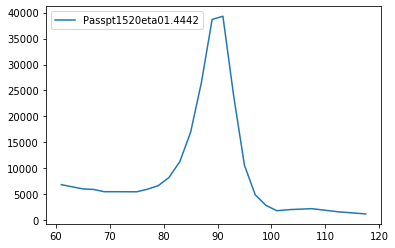

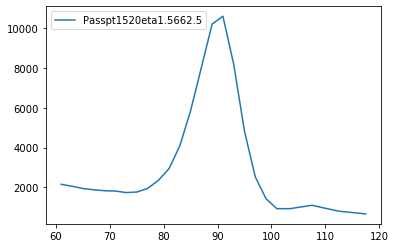

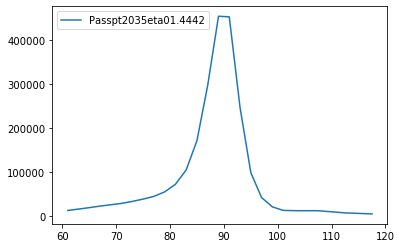

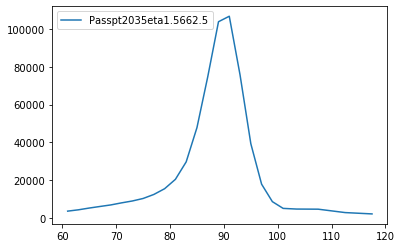

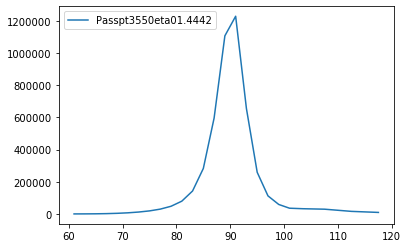

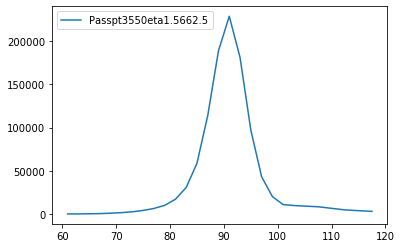

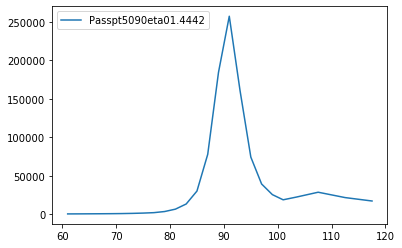

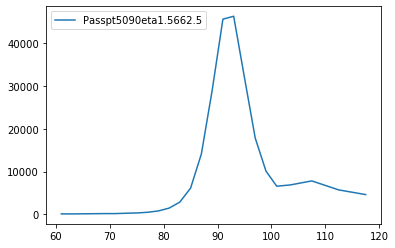

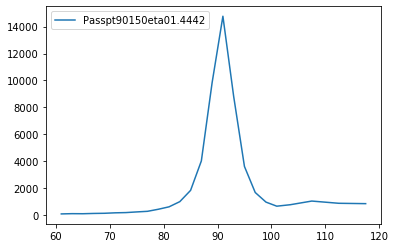

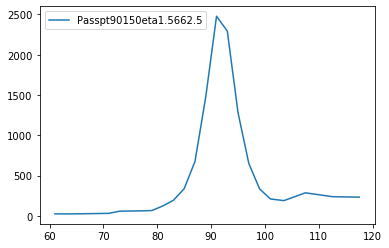

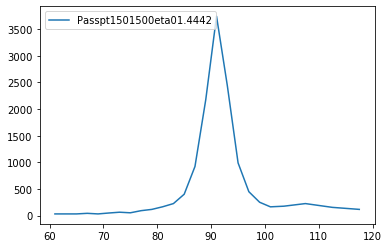

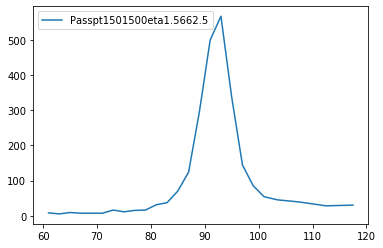

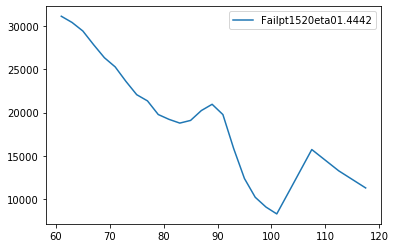

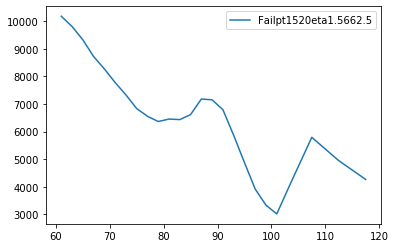

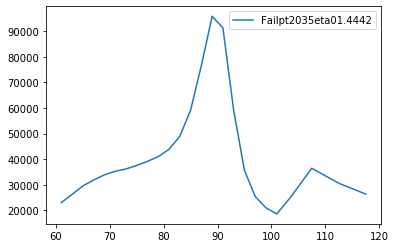

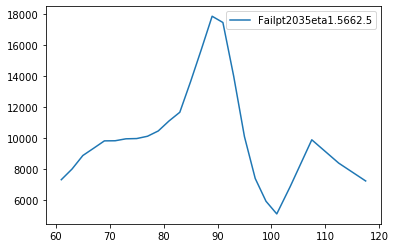

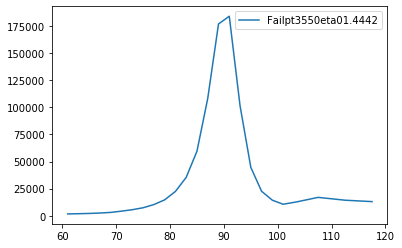

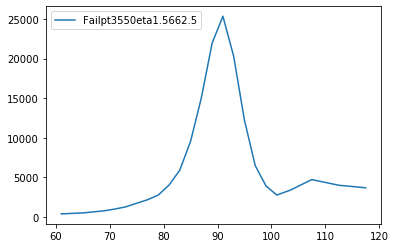

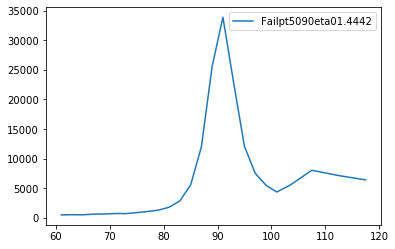

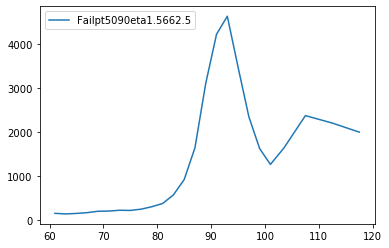

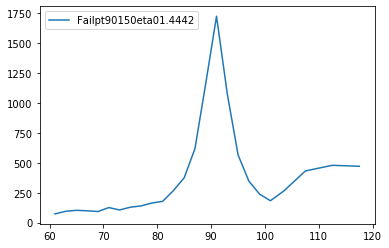

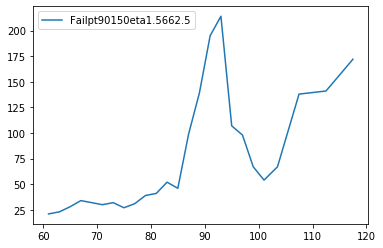

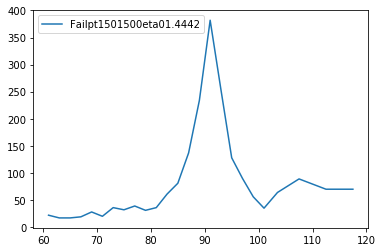

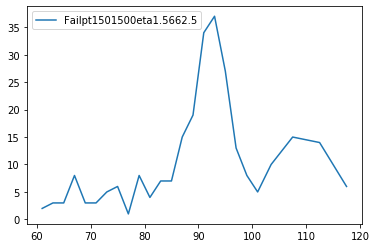

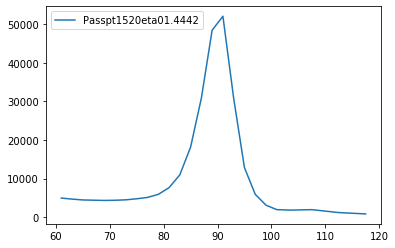

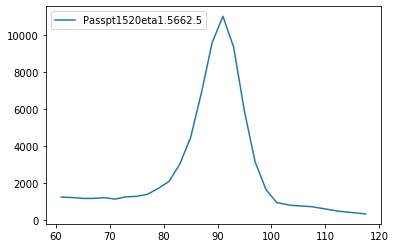

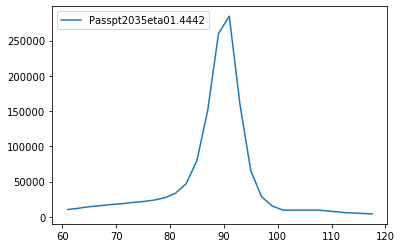

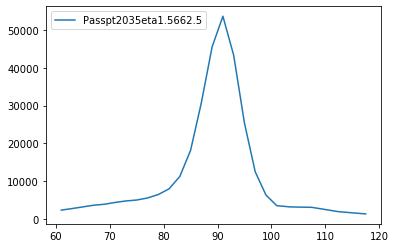

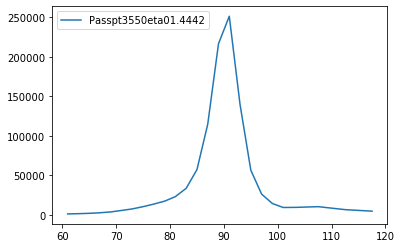

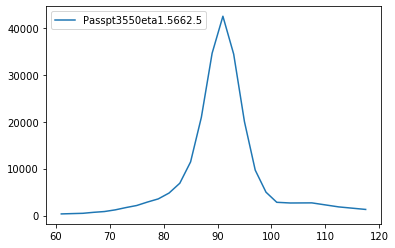

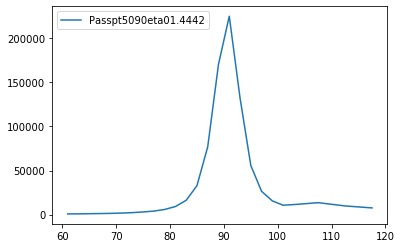

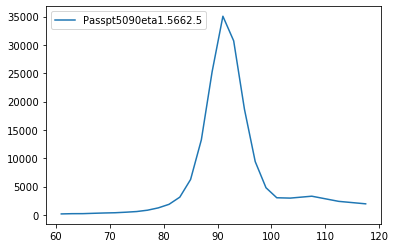

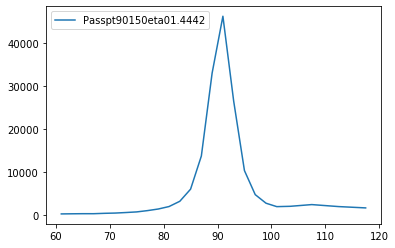

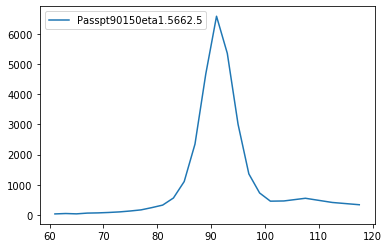

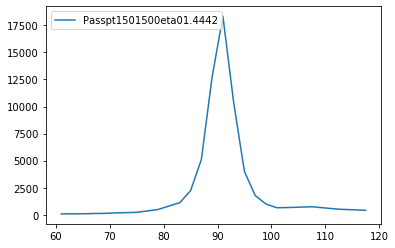

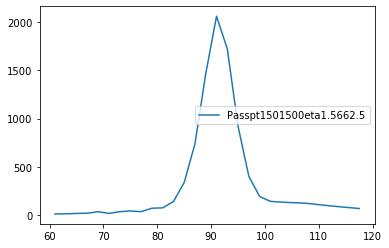

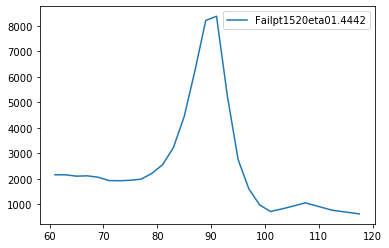

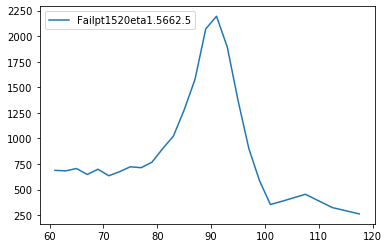

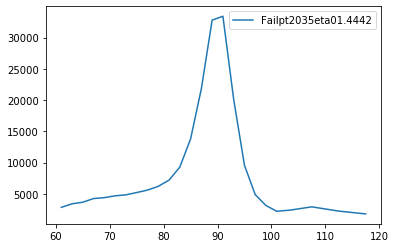

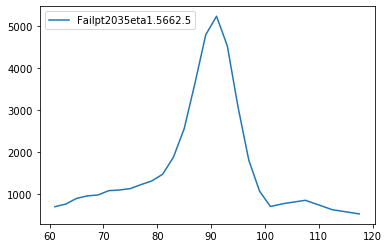

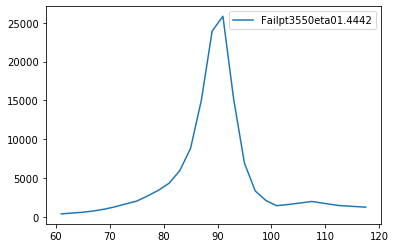

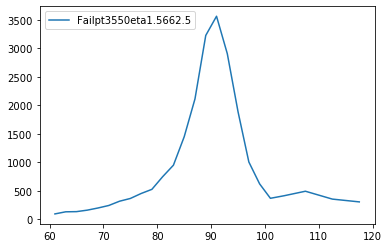

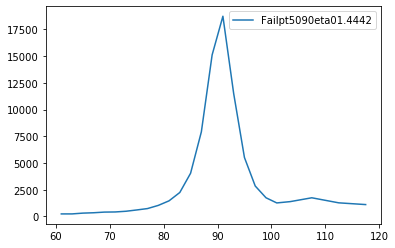

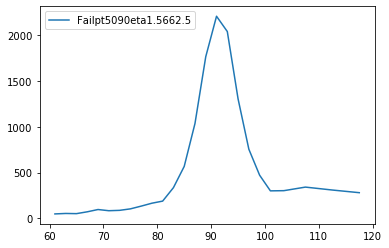

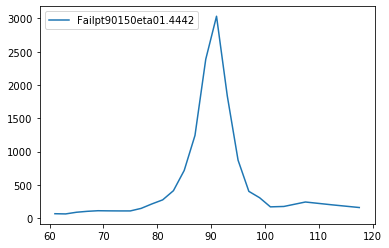

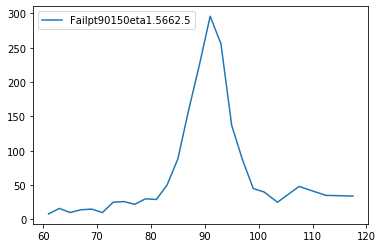

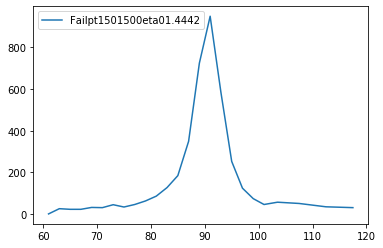

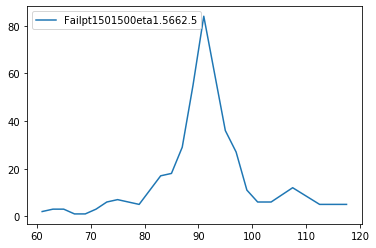

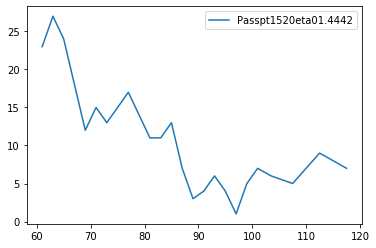

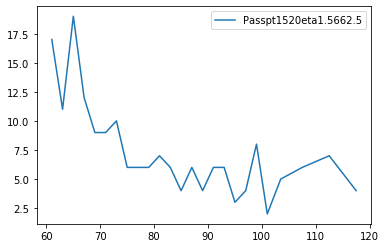

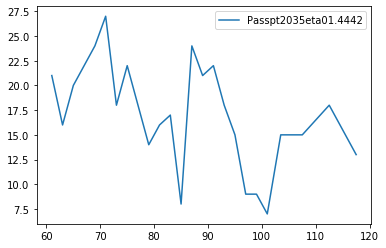

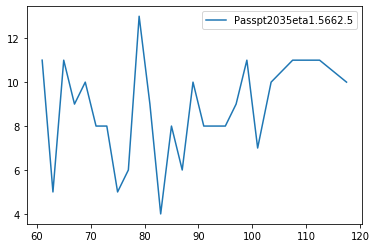

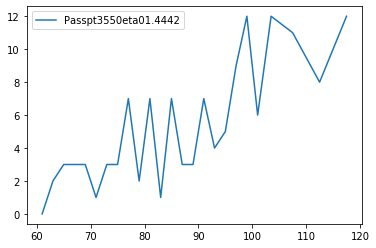

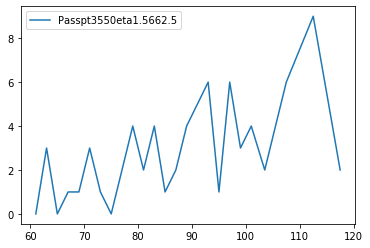

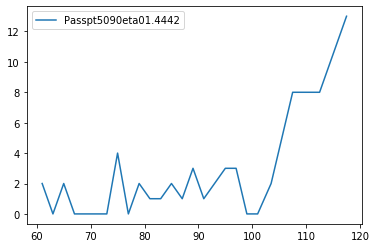

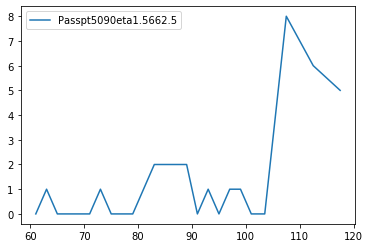

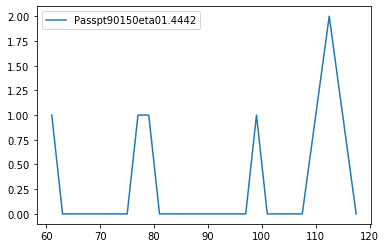

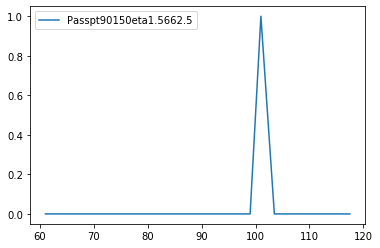

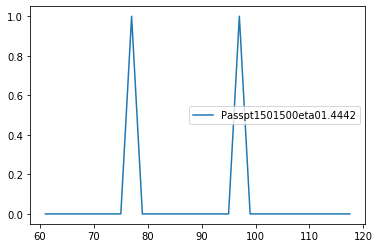

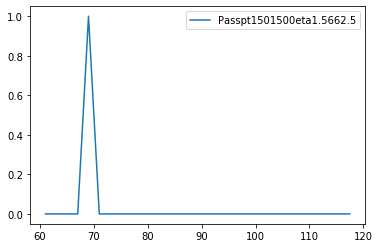

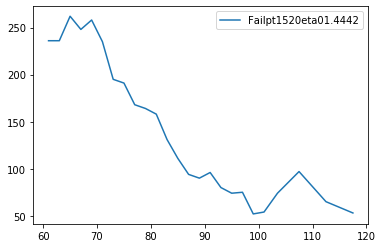

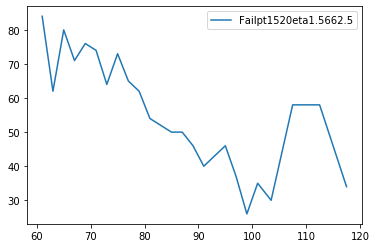

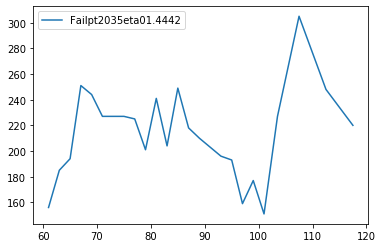

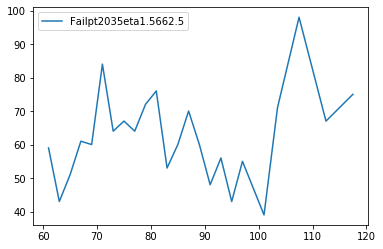

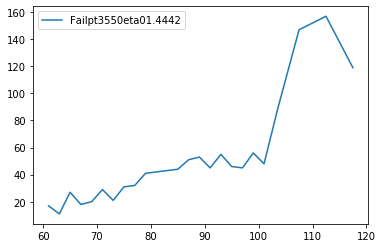

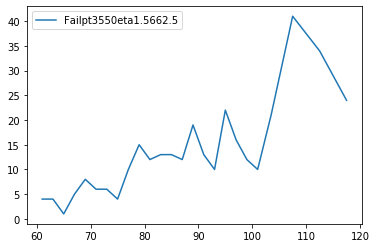

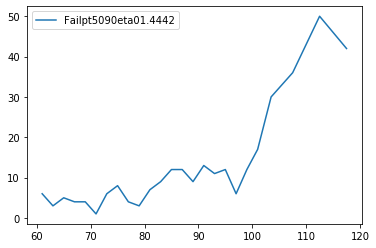

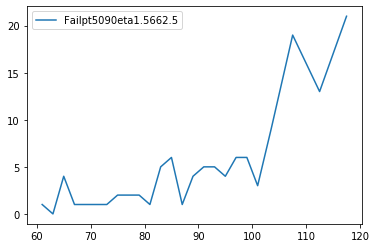

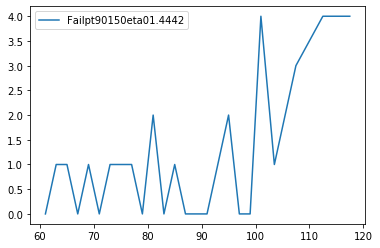

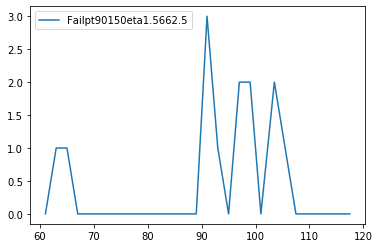

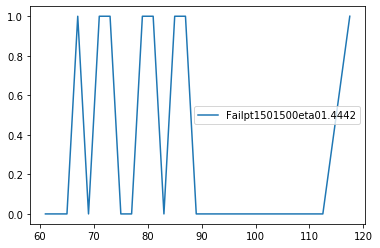

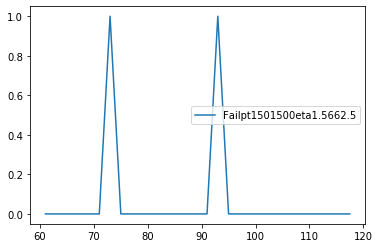

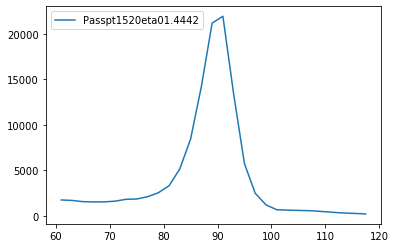

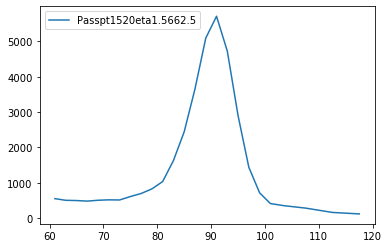

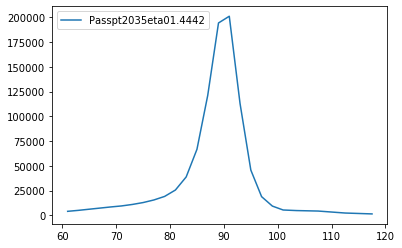

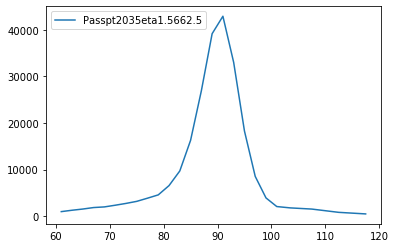

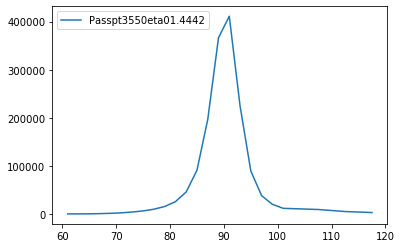

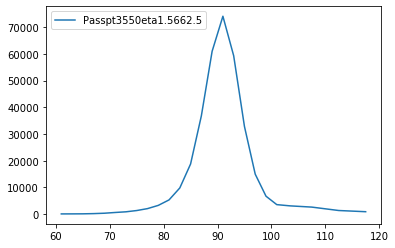

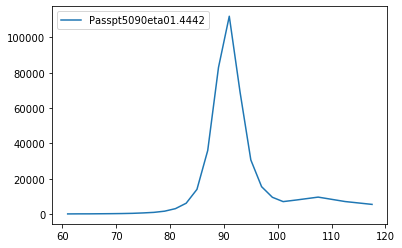

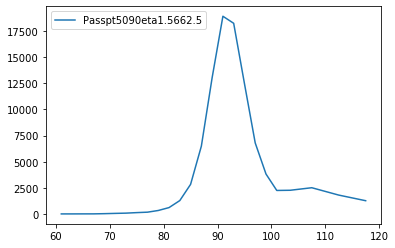

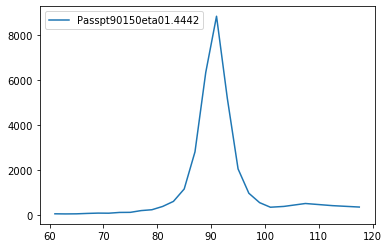

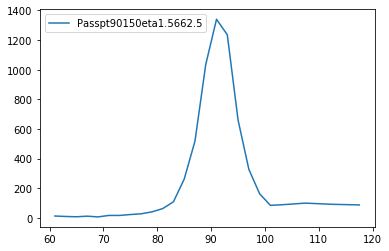

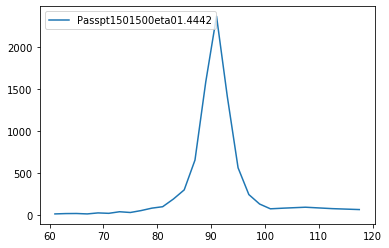

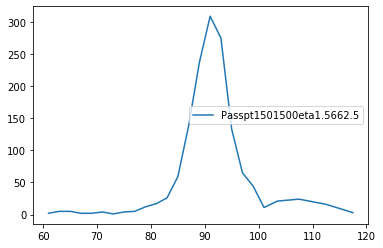

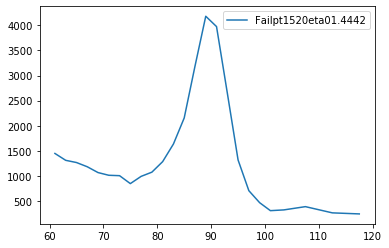

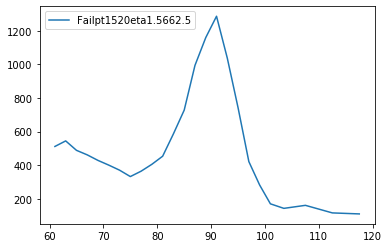

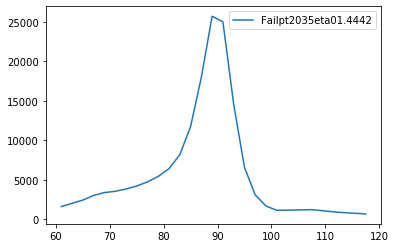

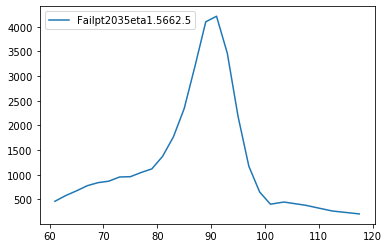

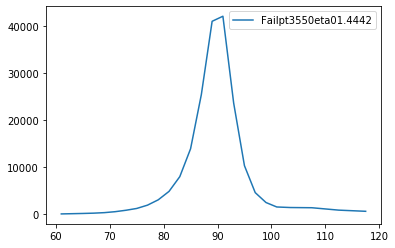

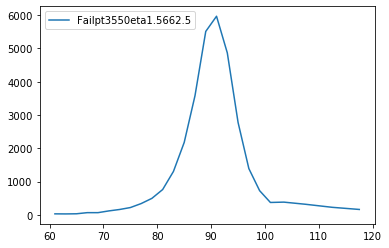

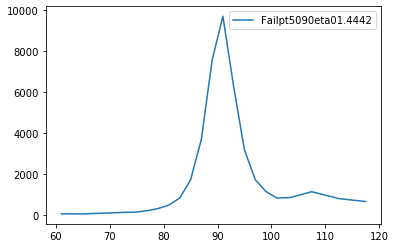

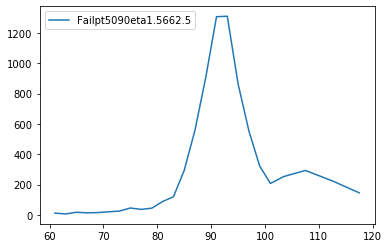

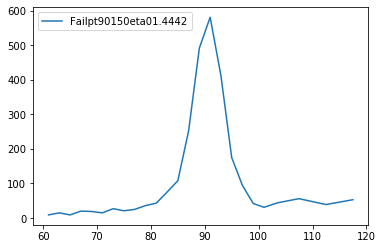

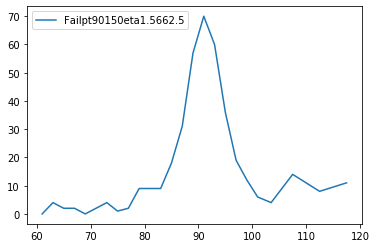

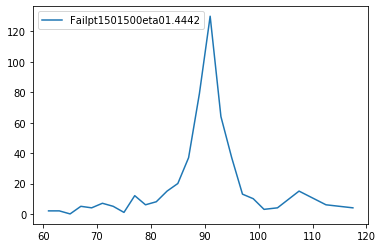

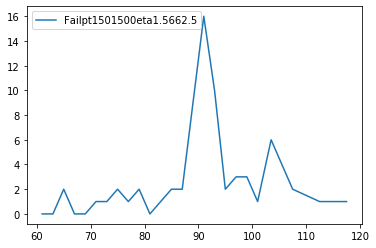

In [12]:
#HEra[0][0].plot(variable='dileptonM')
#for h in HSample['Electron']:
    #print(h.name)
    #print(h.variable)
    #print(h.bins)
    #h.plot()
#plt.figure()

for HS in HEra['2018']:
    print(HS.name)

    for h in HS:
        plt.figure()
        ax = plt.gca()
        
        variable=h.name
        print(variable)
        #print(h.bins)
        print(h.values)

        #plt.hist(CommonHelper.Plot.BinFormat(Bins=h.bins,Type="center"),
        #         weights=h.values)

        ax.plot(CommonHelper.Plot.BinFormat(Bins=h.bins,Type="center"),
                 h.values,
                 label = "".join(h.variable['extra'].split('_')))
    

        ax.legend()

#h.plot()
#Sample['Electron'].plot(variable)

--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail


/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:231: RuntimeWarning: overflow encountered in exp
  u = np.exp(-u)
/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:233: RuntimeWarning: invalid value encountered in multiply
  u[u > 70]  = u[u > 70]*0
/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:234: RuntimeWarning: invalid value encountered in greater_equal
  ind  =  np.logical_and(u>=-70, u<=70)
/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:234: RuntimeWarning: invalid value encountered in less_equal
  ind  =  np.logical_and(u>=-70, u<=70)


--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail
--- Plotting Pass
--- Plotting Fail


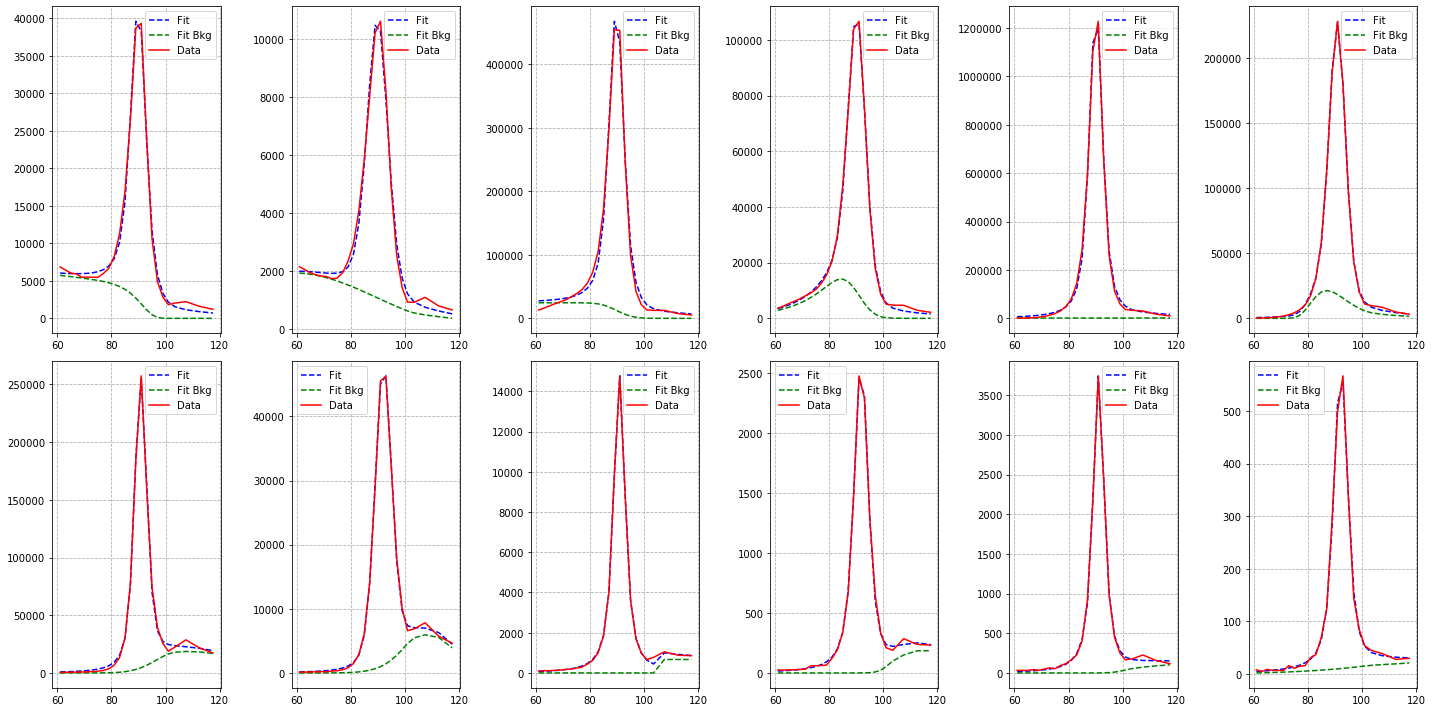

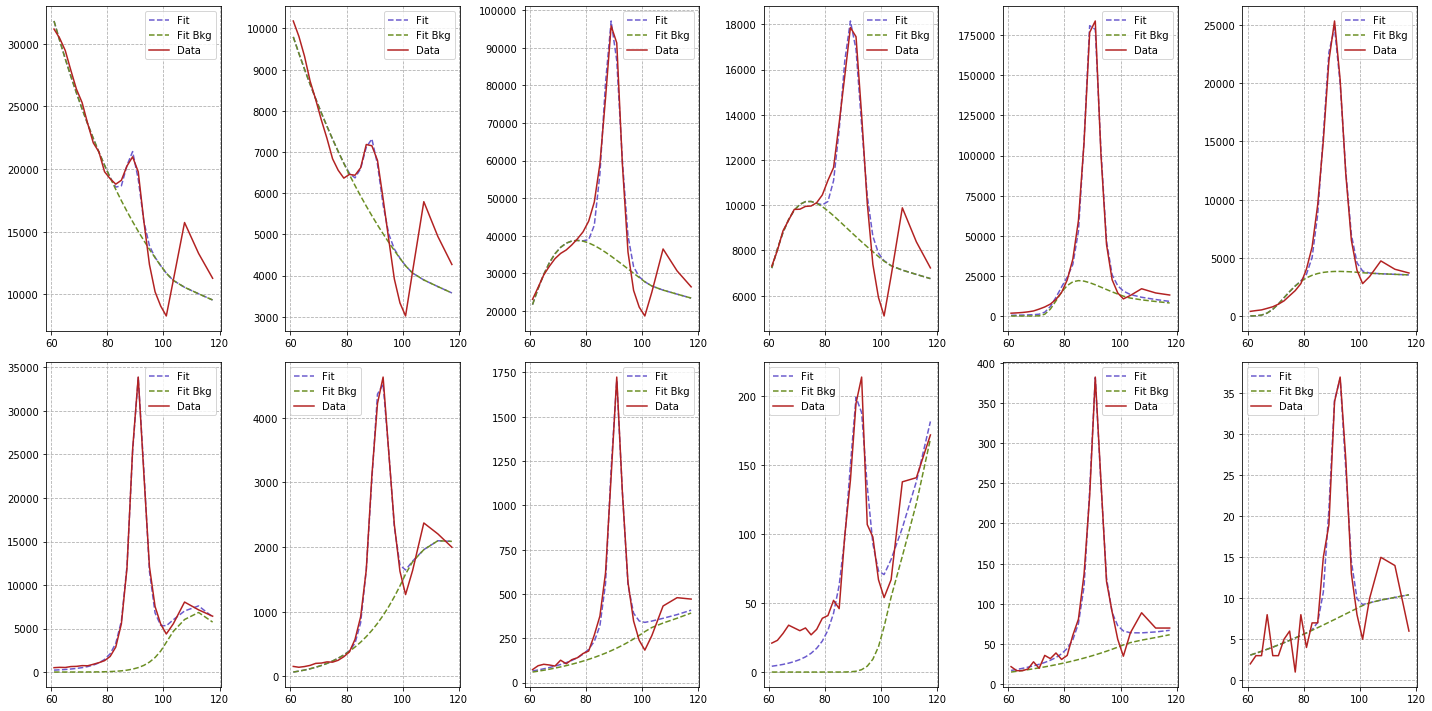

In [13]:
HEra['2018'].GetYieldData(EffType=EffType,figsize = (20,10));

In [14]:
HEra['2018'].GetYieldMC();

In [15]:
#HEra['2018'].FitRes
#HEra['2018']['Electron']['dileptonM_Pass_pt_[15, 20]_eta_[0, 1.4442]'].values
print(histsavepath)
print(type(HEra['2018']),HEra['2018'].name)
print(type(HEra['2018']['Electron']),HEra['2018']['Electron'].name)
#print(HEra['2018']['Electron'].names)
#print(HEra['2018']['Electron']['dileptonM_Pass_pt_[15, 20]_eta_[0, 1.4442]'].names)


#HEra['2018'][]

/home/jcordero/CMS/SMP_ZGamma/histo/2018/ee/20200706/ProbeTrigPass
<class 'Plotter.HistoSampleEff.HistoSampleEff'> 2018
<class 'Plotter.HistoVarEff.HistoVarEff'> Electron


--- Plotting Pass
--- Plotting Fail


([600.0, 30.0, 1, 1, 13, 16, 0.01, 115, 0.1],
 [20.0, 10.0, 0.5, 1, 44, 48, -0.1, 10, 0.1],
 [2260.1401585664594,
  225.2617324516315,
  1.0105590649016092,
  0.8834390720942044,
  15.619660779685457,
  58.648470635448135,
  0.02904436505060637,
  149.48766906745732,
  0.09999999999999998],
 [99.46036275354508,
  163.57726215443512,
  1.5486468069781953,
  7.164063755560335e-06,
  40.64352651016942,
  58.74763397106873,
  0.030951441297303484,
  41.46644048579037,
  -0.015309387135715391])

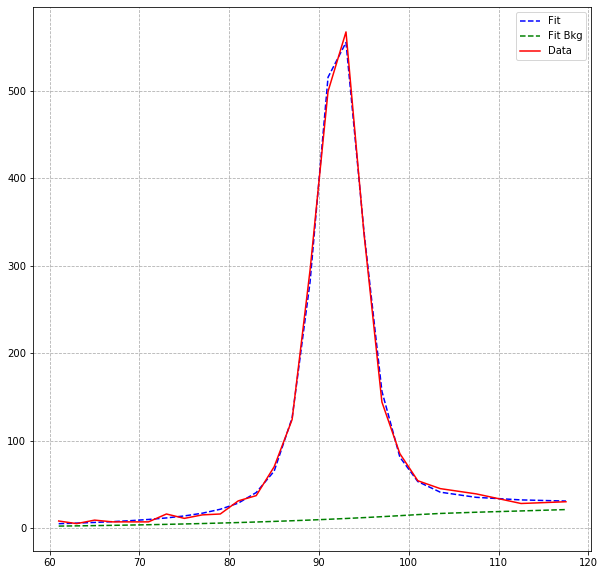

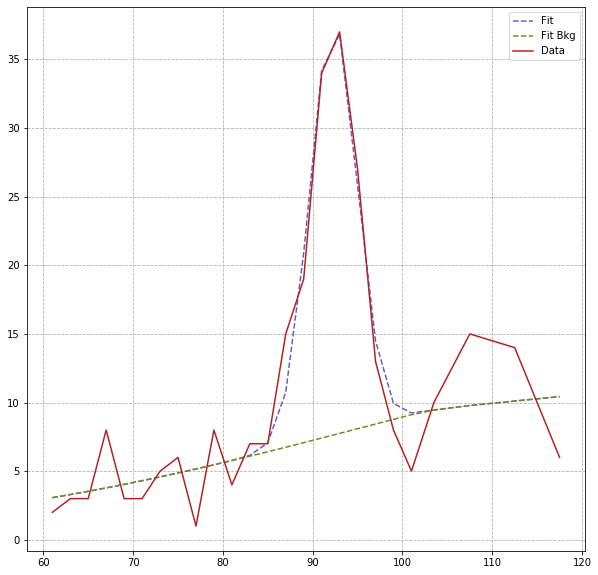

In [16]:
fig1= plt.figure(1,figsize = (10,10))
fig2= plt.figure(2,figsize = (10,10))

ax1 = fig1.gca()
ax2 = fig2.gca()
HEra['2018'].GetYieldOneData(11,ax1,ax2,EffType=EffType)

In [17]:
HEra['2018'].Yield['Electron']['Fail']['[15, 20]']['[1.566, 2.5]']

6601.026065144455

In [18]:
HEra['2018'].Yield['Electron']['Pass']['[15, 20]']['[1.566, 2.5]']

51621.55889437692

In [19]:
HEra['2018'].eff

{'Electron': {'[15, 20]': {'[0, 1.4442]': 0.9134884747813876,
   '[1.566, 2.5]': 0.8866243044733629},
  '[20, 35]': {'[0, 1.4442]': 0.898362520894993,
   '[1.566, 2.5]': 0.9236250090639758},
  '[35, 50]': {'[0, 1.4442]': 0.888856759739842,
   '[1.566, 2.5]': 0.9078767656616029},
  '[50, 90]': {'[0, 1.4442]': 0.8662223093890943,
   '[1.566, 2.5]': 0.932285156118812},
  '[90, 150]': {'[0, 1.4442]': 0.9113331141299092,
   '[1.566, 2.5]': 0.8951204262796743},
  '[150, 1500]': {'[0, 1.4442]': 0.9132954571083531,
   '[1.566, 2.5]': 0.9578486435077133}},
 'Diboson': {'[15, 20]': {'[0, 1.4442]': 0.8021318386092567,
   '[1.566, 2.5]': 0.7648207720588235},
  '[20, 35]': {'[0, 1.4442]': 0.8635252128415128,
   '[1.566, 2.5]': 0.8762474203488536},
  '[35, 50]': {'[0, 1.4442]': 0.8862997218347015,
   '[1.566, 2.5]': 0.9035928218909721},
  '[50, 90]': {'[0, 1.4442]': 0.9100257797362777,
   '[1.566, 2.5]': 0.9271884070865354},
  '[90, 150]': {'[0, 1.4442]': 0.923526752923894,
   '[1.566, 2.5]': 0.9442

In [20]:
figpath
#histsavepath

'/home/jcordero/CMS/SMP_ZGamma/fig/2018/ee/20200706/ProbeTrigPass'

In [21]:
FIGPATH = histsavepath+"/eff.root"

In [22]:
bins1 = HEra['2018']['Electron'].bins1
bins2 = HEra['2018']['Electron'].bins2

#hist2d = HEra['2018'].EffPlot(figpath=FIGPATH,bins1=bins1,bins2=bins2)

In [23]:
#HEra['2018'].GetYieldData()
#HEra['2018'].getData().name
Pass = HEra['2018'].getData().getPass()

In [24]:
HEra['2018'].effStat

{'Electron': {'[15, 20]': {'[0, 1.4442]': 5.1308451692207506e-05,
   '[1.566, 2.5]': 0.00042040669221777096},
  '[20, 35]': {'[0, 1.4442]': 3.7475945985025874e-06,
   '[1.566, 2.5]': 3.3850495817152935e-05},
  '[35, 50]': {'[0, 1.4442]': 2.7978873472749616e-06,
   '[1.566, 2.5]': 6.009836744324027e-06},
  '[50, 90]': {'[0, 1.4442]': 1.0872772524892086e-05,
   '[1.566, 2.5]': 0.00010133249758937947},
  '[90, 150]': {'[0, 1.4442]': 0.0001294901083513745,
   '[1.566, 2.5]': 0.00043883796910410146},
  '[150, 1500]': {'[0, 1.4442]': 0.0005030350848097116,
   '[1.566, 2.5]': 0.004857014226438788}},
 'Diboson': {'[15, 20]': {'[0, 1.4442]': 0.002047899995590914,
   '[1.566, 2.5]': 0.0037546923425420113},
  '[20, 35]': {'[0, 1.4442]': 0.0010165396072180381,
   '[1.566, 2.5]': 0.0021558695735930185},
  '[35, 50]': {'[0, 1.4442]': 0.0011918121112003048,
   '[1.566, 2.5]': 0.002683315276770502},
  '[50, 90]': {'[0, 1.4442]': 0.0013758990423925156,
   '[1.566, 2.5]': 0.0031521739928963045},
  '[90,

In [25]:
import array
from ROOT import TCanvas,TTree,gStyle,TH2F


fileOut = TFile(FIGPATH,"recreate")
tree = TTree("eff_photon","eff_photon")

gStyle.SetOptStat(0)
#################################################

Bin1 = array.array("f",CommonHelper.Plot.BinFormat(bins1,Type='edges'))
Bin2 = array.array("f",CommonHelper.Plot.BinFormat(bins2,Type='edges'))

HISTO = HEra['2018']

#nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
histDraw = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
hist2d = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

#nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
statDraw = TH2F("EGamma_eff_draw_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
stat2d = TH2F("EGamma_eff_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)


#################################################
tree.Branch("eff",hist2d,"TH2F")


for j,binj in zip(range(nBin1),bins1):
    hist2d.GetZaxis().SetRangeUser(0.6,1.1)

    for i,bini in zip(range(nBin2),bins2):
        print(j,i,bini,binj)
        #EFF = self.effMC[str(binj)][str(bini)]
        #EFFStat = self.effMCStat[str(binj)][str(bini)]
        EFF = HISTO.eff['Electron'][str(binj)][str(bini)]
        EFFStat = HISTO.effStat['Electron'][str(binj)][str(bini)]

        hist2d.SetBinContent(int(j)+1, int(i)+1, EFF)
        #histDraw.SetBinContent(int(j)+1, int(i)+1, EFF)

        stat2d.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        #statDraw.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        tree.Fill()

hist2d.GetZaxis().SetRangeUser(0.6,0.95)
hist2d.Draw("COLZ text")

fileOut.Write()

0 0 [0, 1.4442] [15, 20]
0 1 [1.566, 2.5] [15, 20]
1 0 [0, 1.4442] [20, 35]
1 1 [1.566, 2.5] [20, 35]
2 0 [0, 1.4442] [35, 50]
2 1 [1.566, 2.5] [35, 50]
3 0 [0, 1.4442] [50, 90]
3 1 [1.566, 2.5] [50, 90]
4 0 [0, 1.4442] [90, 150]
4 1 [1.566, 2.5] [90, 150]
5 0 [0, 1.4442] [150, 1500]
5 1 [1.566, 2.5] [150, 1500]


1511

Warning in <TFile::Append>: Replacing existing TH1: EGamma_eff (Potential memory leak).
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [26]:
HEra['2018'].eff['Electron']

{'[15, 20]': {'[0, 1.4442]': 0.9134884747813876,
  '[1.566, 2.5]': 0.8866243044733629},
 '[20, 35]': {'[0, 1.4442]': 0.898362520894993,
  '[1.566, 2.5]': 0.9236250090639758},
 '[35, 50]': {'[0, 1.4442]': 0.888856759739842,
  '[1.566, 2.5]': 0.9078767656616029},
 '[50, 90]': {'[0, 1.4442]': 0.8662223093890943,
  '[1.566, 2.5]': 0.932285156118812},
 '[90, 150]': {'[0, 1.4442]': 0.9113331141299092,
  '[1.566, 2.5]': 0.8951204262796743},
 '[150, 1500]': {'[0, 1.4442]': 0.9132954571083531,
  '[1.566, 2.5]': 0.9578486435077133}}

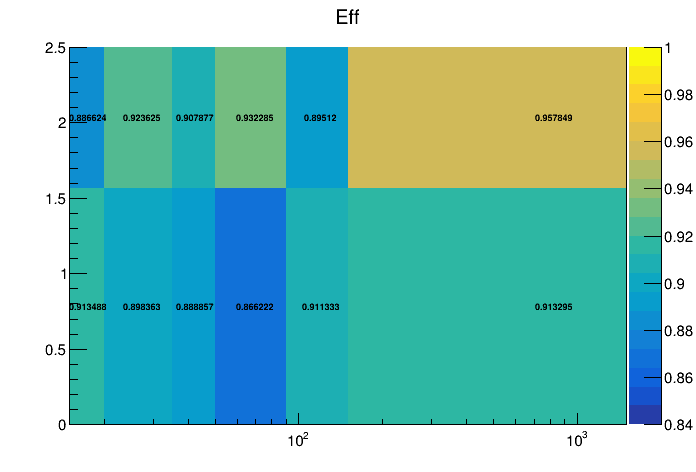

In [27]:
c = TCanvas()
hist2d.GetZaxis().SetRangeUser(0.84,1)
hist2d.Draw("COLZ text")
c.SetLogx()
c.Draw()

In [28]:
import array
from ROOT import TCanvas,TTree,gStyle,TH2F

FIGPATH = histsavepath+"/eff_mc.root"
fileOut = TFile(FIGPATH,"recreate")
tree = TTree("eff_mc_photon","eff_mc_photon")

gStyle.SetOptStat(0)
#################################################

Bin1 = array.array("f",CommonHelper.Plot.BinFormat(bins1,Type='edges'))
Bin2 = array.array("f",CommonHelper.Plot.BinFormat(bins2,Type='edges'))

HISTO = HEra['2018']

#nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
histDraw = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)


nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
hist2d = TH2F("EGamma_eff","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

#nBin1,nBin2 = HISTO.nBin1-2, HISTO.nBin2-1
nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
statDraw = TH2F("EGamma_eff_draw_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)

nBin1,nBin2 = HISTO.nBin1, HISTO.nBin2
stat2d = TH2F("EGamma_eff_stat","Eff",
              nBin1, Bin1,
              nBin2, Bin2)


#################################################
tree.Branch("eff",hist2d,"TH2F")


for j,binj in zip(range(nBin1),bins1):
    hist2d.GetZaxis().SetRangeUser(0.6,1.1)

    for i,bini in zip(range(nBin2),bins2):
        print(j,i,bini,binj)
        EFF = HISTO.eff['DYJets'][str(binj)][str(bini)]
        EFFStat = HISTO.effStat['DYJets'][str(binj)][str(bini)]

        hist2d.SetBinContent(int(j)+1, int(i)+1, EFF)
        histDraw.SetBinContent(int(j)+1, int(i)+1, EFF)

        stat2d.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        statDraw.SetBinContent(int(j)+1, int(i)+1, EFFStat)
        tree.Fill()

hist2d.GetZaxis().SetRangeUser(0.6,0.95)
hist2d.Draw("COLZ text")

fileOut.Write()

0 0 [0, 1.4442] [15, 20]
0 1 [1.566, 2.5] [15, 20]
1 0 [0, 1.4442] [20, 35]
1 1 [1.566, 2.5] [20, 35]
2 0 [0, 1.4442] [35, 50]
2 1 [1.566, 2.5] [35, 50]
3 0 [0, 1.4442] [50, 90]
3 1 [1.566, 2.5] [50, 90]
4 0 [0, 1.4442] [90, 150]
4 1 [1.566, 2.5] [90, 150]
5 0 [0, 1.4442] [150, 1500]
5 1 [1.566, 2.5] [150, 1500]


1577

Warning in <TFile::Append>: Replacing existing TH1: EGamma_eff (Potential memory leak).


In [29]:
HISTO.eff['DYJets']

{'[15, 20]': {'[0, 1.4442]': 0.7746353844737569,
  '[1.566, 2.5]': 0.7411985094988903},
 '[20, 35]': {'[0, 1.4442]': 0.8554686057934293,
  '[1.566, 2.5]': 0.8729173050582767},
 '[35, 50]': {'[0, 1.4442]': 0.8929825710952696,
  '[1.566, 2.5]': 0.913867119856311},
 '[50, 90]': {'[0, 1.4442]': 0.9098844600738663,
  '[1.566, 2.5]': 0.9259209257473481},
 '[90, 150]': {'[0, 1.4442]': 0.9217151162790698,
  '[1.566, 2.5]': 0.9420849420849421},
 '[150, 1500]': {'[0, 1.4442]': 0.9434878076967526,
  '[1.566, 2.5]': 0.9543010752688172}}

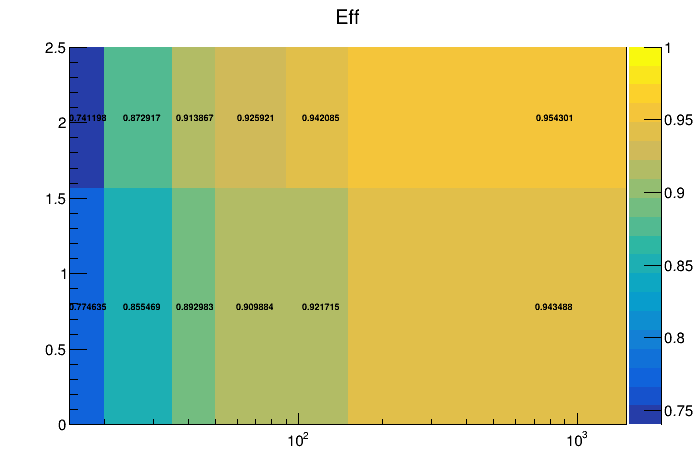

In [30]:
c = TCanvas()
hist2d.GetZaxis().SetRangeUser(0.74,1)
hist2d.Draw("COLZ text")
c.SetLogx()
c.Draw()

In [31]:
HEra['2018'].eff

{'Electron': {'[15, 20]': {'[0, 1.4442]': 0.9134884747813876,
   '[1.566, 2.5]': 0.8866243044733629},
  '[20, 35]': {'[0, 1.4442]': 0.898362520894993,
   '[1.566, 2.5]': 0.9236250090639758},
  '[35, 50]': {'[0, 1.4442]': 0.888856759739842,
   '[1.566, 2.5]': 0.9078767656616029},
  '[50, 90]': {'[0, 1.4442]': 0.8662223093890943,
   '[1.566, 2.5]': 0.932285156118812},
  '[90, 150]': {'[0, 1.4442]': 0.9113331141299092,
   '[1.566, 2.5]': 0.8951204262796743},
  '[150, 1500]': {'[0, 1.4442]': 0.9132954571083531,
   '[1.566, 2.5]': 0.9578486435077133}},
 'Diboson': {'[15, 20]': {'[0, 1.4442]': 0.8021318386092567,
   '[1.566, 2.5]': 0.7648207720588235},
  '[20, 35]': {'[0, 1.4442]': 0.8635252128415128,
   '[1.566, 2.5]': 0.8762474203488536},
  '[35, 50]': {'[0, 1.4442]': 0.8862997218347015,
   '[1.566, 2.5]': 0.9035928218909721},
  '[50, 90]': {'[0, 1.4442]': 0.9100257797362777,
   '[1.566, 2.5]': 0.9271884070865354},
  '[90, 150]': {'[0, 1.4442]': 0.923526752923894,
   '[1.566, 2.5]': 0.9442

In [32]:
CommonHelper.Plot.BinFormat(Bins=bins1,Type="edges")

array('f', [15.0, 20.0, 35.0, 50.0, 90.0, 150.0, 1500.0])

In [33]:
bins2

[[0, 1.4442], [1.566, 2.5]]